# Walmart Sales Data Analysis & Forecasting with Python & SPSS

**Project Description:**  
This project aims to analyze Walmart sales data to uncover patterns, understand key drivers, and forecast future sales. Sales forecasting helps in inventory management, staffing, and strategic planning.  

**Dataset Details:**  
- Contains historical sales data across multiple Walmart stores and departments.  
- Includes features like `Store`, `Dept`, `Date`, `Weekly_Sales`, `Holiday_Flag`, `Temperature`, `Fuel_Price`, `CPI`, and `Unemployment`.


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/input/walmart-sales/Walmart_Sales.csv")

# Preview data
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Data Cleaning
Steps:
1. Handle missing values.
2. Convert `Date` to datetime format.
3. Remove duplicates.
4. Detect and handle outliers.



Number of duplicates found: 0
Data shape after removing duplicates: (6435, 8)

Number of outliers detected: 34
Data shape after removing outliers: (6401, 8)

Summary statistics after outlier removal:
count    6.401000e+03
mean     1.036130e+06
std      5.451961e+05
min      2.099862e+05
25%      5.517431e+05
50%      9.572983e+05
75%      1.414565e+06
max      2.685352e+06
Name: Weekly_Sales, dtype: float64


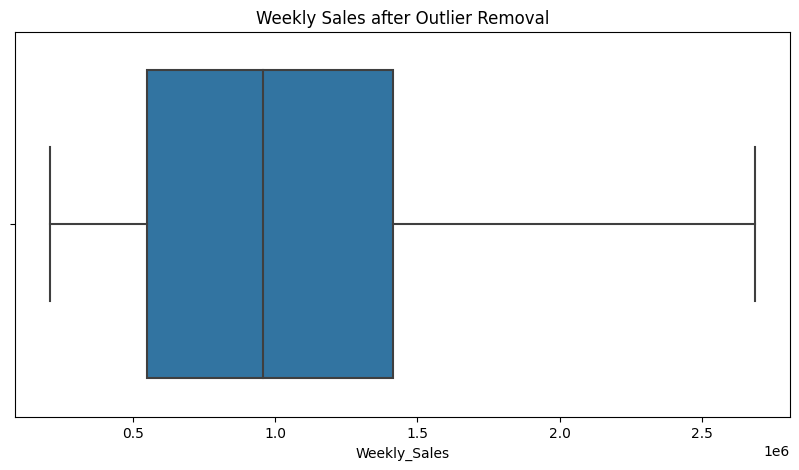

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 4. Remove duplicates
# ----------------------------
duplicates_count = df.duplicated().sum()
print("\nNumber of duplicates found:", duplicates_count)

df = df.drop_duplicates()
print("Data shape after removing duplicates:", df.shape)

# ----------------------------
# 5. Detect and remove outliers (IQR method)
# ----------------------------
# Ensure Weekly_Sales has no missing values
if df['Weekly_Sales'].isnull().sum() > 0:
    print("Missing values found in Weekly_Sales. Filling with forward fill.")
    df['Weekly_Sales'] = df['Weekly_Sales'].fillna(method='ffill')

Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]
print("\nNumber of outliers detected:", outliers.shape[0])

# Remove outliers
df = df[(df['Weekly_Sales'] >= lower_bound) & (df['Weekly_Sales'] <= upper_bound)]
print("Data shape after removing outliers:", df.shape)

# Show summary stats after outlier removal
print("\nSummary statistics after outlier removal:")
print(df['Weekly_Sales'].describe())

# ----------------------------
# 6. Optional: visualize Weekly_Sales after outlier removal
# ----------------------------
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Weekly_Sales'])
plt.title("Weekly Sales after Outlier Removal")
plt.show()


## Exploratory Data Analysis
- Analyze sales trends over time.
- Compare sales by store.
- Holiday vs non-holiday sales.
- Visualize correlations between numeric features.


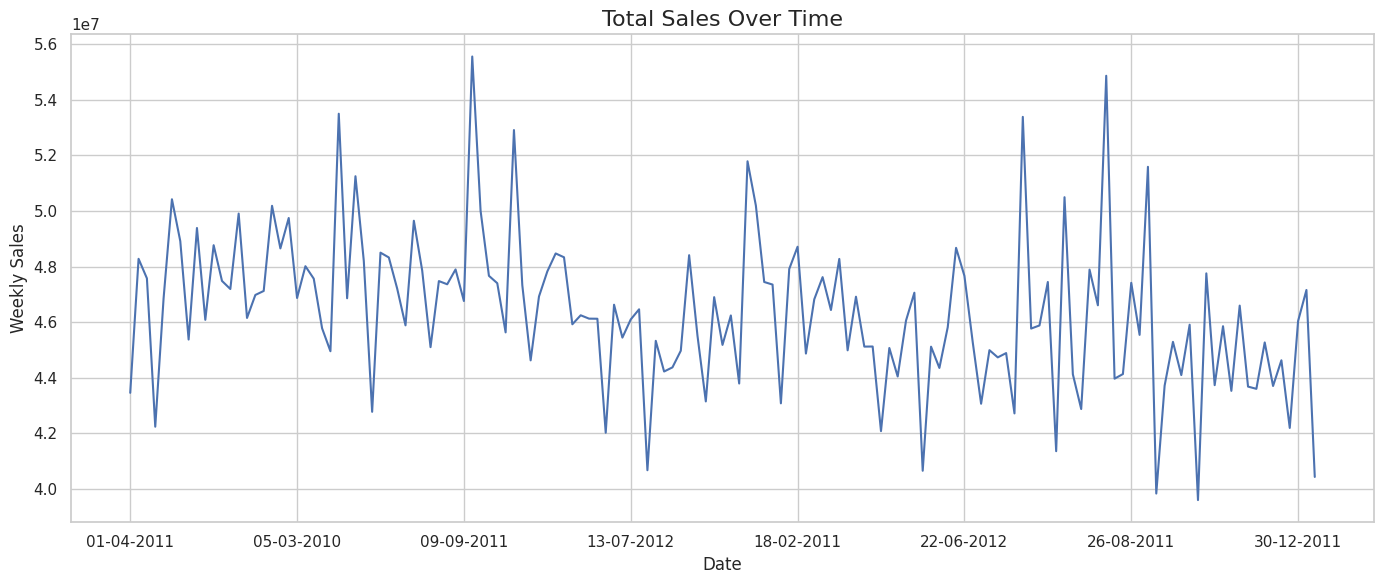

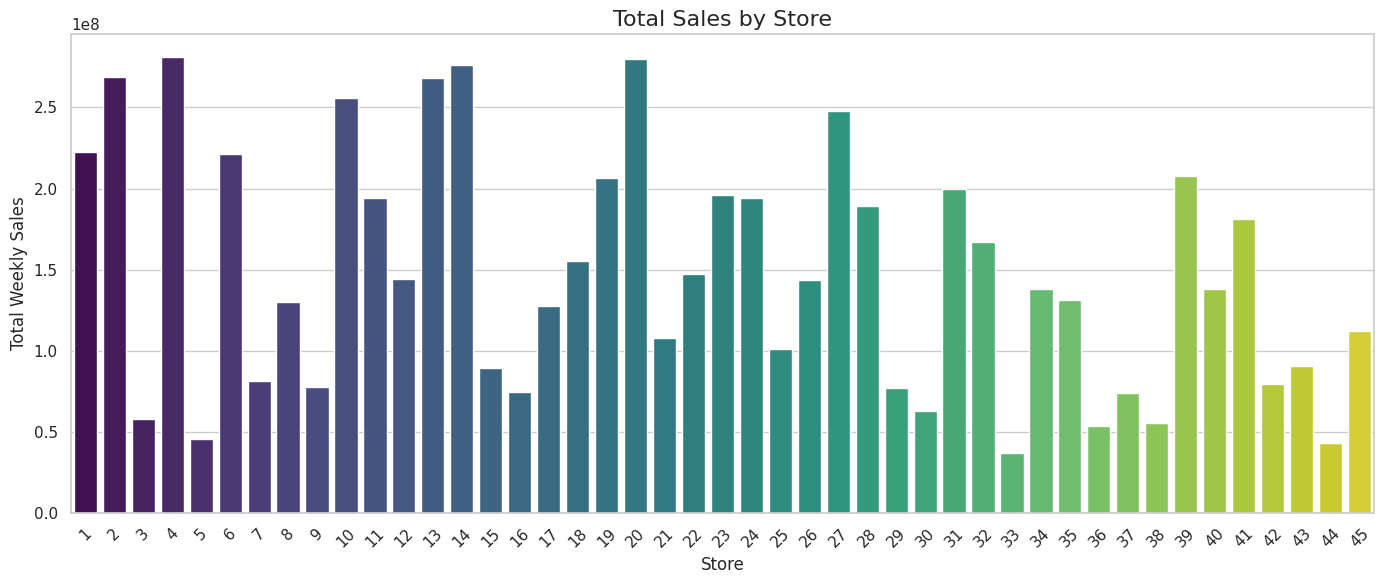

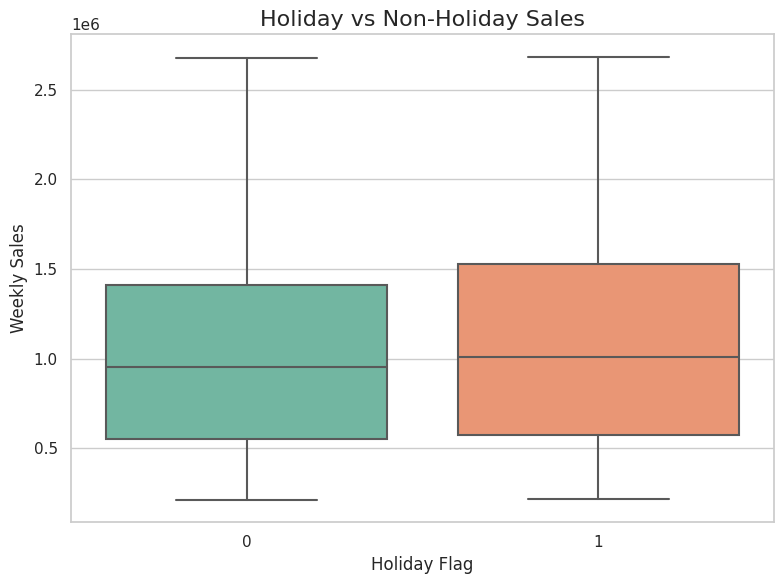

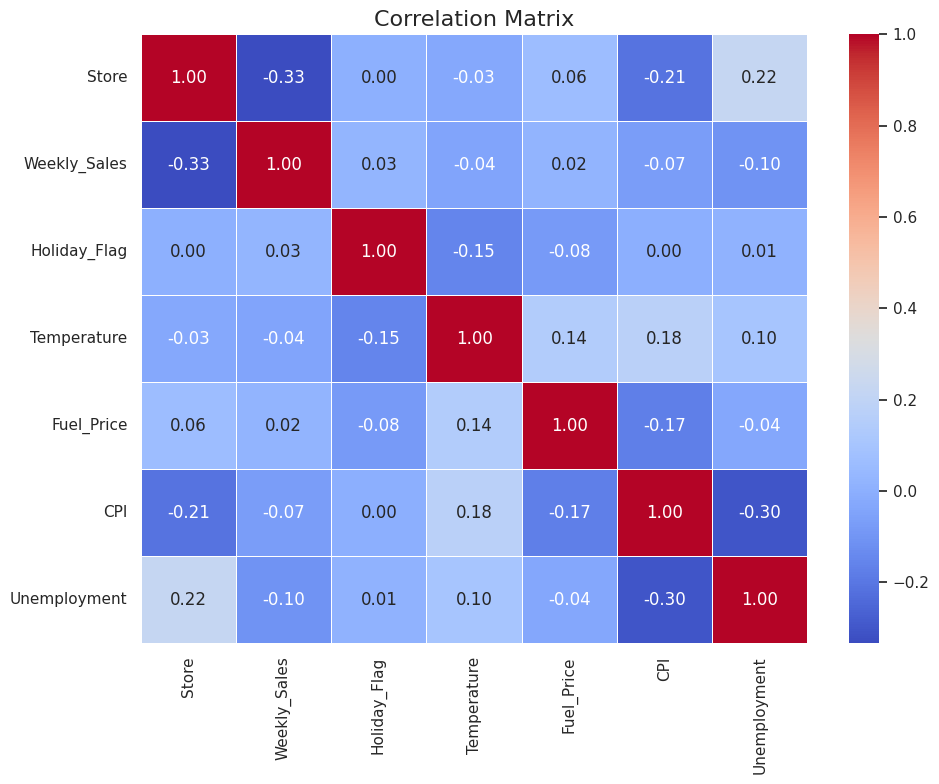

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# ----------------------------
# 1. Sales trend over time
# ----------------------------
plt.figure(figsize=(14,6))
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.tight_layout()
plt.show()

# ----------------------------
# 2. Sales by store
# ----------------------------
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=store_sales.index, y=store_sales.values, palette="viridis")
plt.title('Total Sales by Store', fontsize=16)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Weekly Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------
# 3. Holiday vs Non-holiday sales
# ----------------------------
plt.figure(figsize=(8,6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df, palette="Set2")
plt.title('Holiday vs Non-Holiday Sales', fontsize=16)
plt.xlabel('Holiday Flag', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Correlation Matrix
# ----------------------------
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()


## Descriptive & Statistical Analysis
- Summary statistics of key variables.
- T-test: compare holiday vs non-holiday sales.
- Correlations with CPI, Fuel Price, Unemployment.


In [4]:
from scipy.stats import ttest_ind

# ----------------------------
# 1. Descriptive statistics
# ----------------------------
print("Descriptive Statistics for Numeric Columns:\n")
print(df.describe())

# ----------------------------
# 2. T-test: Holiday vs Non-holiday sales
# ----------------------------
holiday_sales = df[df['Holiday_Flag']==1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag']==0]['Weekly_Sales']

t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)  # Welch's t-test
print("\nT-Test: Holiday vs Non-Holiday Sales")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4e}")

if p_value < 0.05:
    print("=> Significant difference between holiday and non-holiday sales.")
else:
    print("=> No significant difference between holiday and non-holiday sales.")

# ----------------------------
# 3. Correlations with economic indicators
# ----------------------------
corr_cols = ['Weekly_Sales','CPI','Fuel_Price','Unemployment']
correlations = df[corr_cols].corr()
print("\nCorrelation Matrix:")
print(correlations.round(3))


Descriptive Statistics for Numeric Columns:

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6401.000000  6.401000e+03   6401.000000  6401.000000  6401.000000   
mean     23.054210  1.036130e+06      0.068895    60.772042     3.359634   
std      12.991284  5.451961e+05      0.253296    18.417068     0.459696   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.517431e+05      0.000000    47.660000     2.933000   
50%      23.000000  9.572983e+05      0.000000    62.860000     3.452000   
75%      34.000000  1.414565e+06      0.000000    75.000000     3.737000   
max      45.000000  2.685352e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6401.000000   6401.000000  
mean    171.642219      8.002298  
std      39.359852      1.878705  
min     126.064000      3.879000  
25%     131.784000      6.891000  
50%     182.658578      7.874000  
75%     212.833640      8

## Time Series Forecasting
- Select one store for forecasting.
- Apply ARIMA/SARIMA model.
- Predict future sales.


In [5]:
store_df = df[df['Store']==1].groupby('Date')['Weekly_Sales'].sum()
store_df = store_df.sort_index()           # ensure chronological order
store_df = store_df.asfreq('W')            # set weekly frequency


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results wi

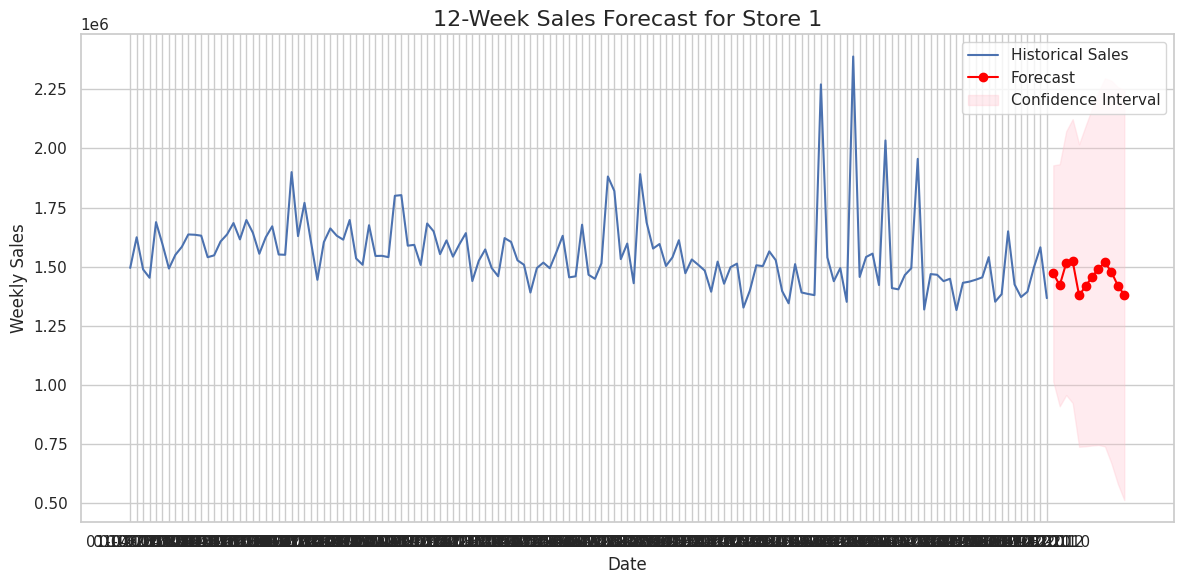

In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Filter store and aggregate weekly sales
store_df = df[df['Store']==1].groupby('Date')['Weekly_Sales'].sum()

# ----------------------------
# 1. Filter data for Store 1 and aggregate weekly sales
# ----------------------------
store_df = df[df['Store']==1].groupby('Date')['Weekly_Sales'].sum()

# ----------------------------
# 2. Fit SARIMA model
# ----------------------------
# Order: (p,d,q), Seasonal order: (P,D,Q,s)
model = SARIMAX(store_df, order=(1,1,1), seasonal_order=(1,1,1,52))
results = model.fit(disp=False)  # disp=False suppresses convergence output

# ----------------------------
# 3. Forecast next 12 weeks
# ----------------------------
forecast = results.get_forecast(steps=12)
forecast_df = forecast.summary_frame()

# ----------------------------
# 4. Plot forecast
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(store_df.index, store_df.values, label='Historical Sales')
plt.plot(forecast_df.index, forecast_df['mean'], color='red', marker='o', label='Forecast')
plt.fill_between(forecast_df.index, 
                 forecast_df['mean_ci_lower'], 
                 forecast_df['mean_ci_upper'], 
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('12-Week Sales Forecast for Store 1', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


## Regression / Machine Learning
- Select features: Fuel_Price, CPI, Temperature, Unemployment.
- Train/test split.
- Apply Linear Regression.
- Evaluate accuracy using R².


R² score on test set: 0.0261

Regression Coefficients:
        Feature   Coefficient
0    Fuel_Price  -9816.036593
1           CPI  -1492.582442
2   Temperature    -43.784739
3  Unemployment -38626.033631

Intercept: 1631883.5593


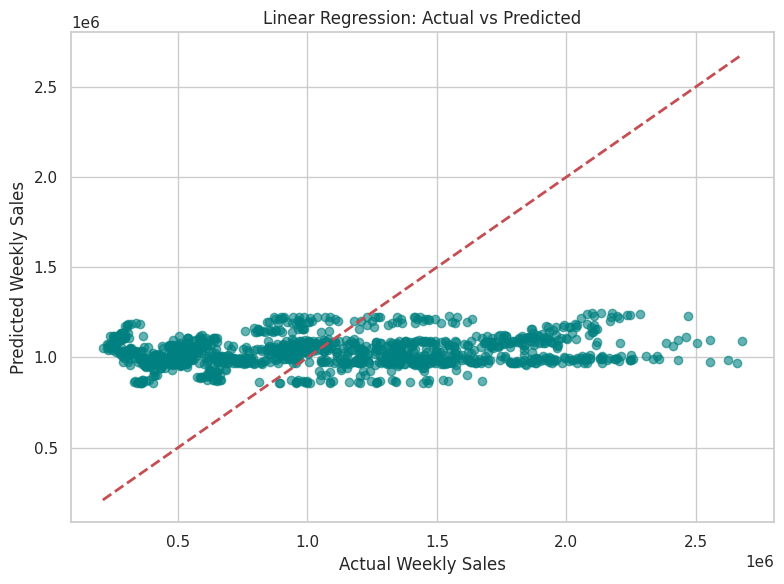

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------
# 1. Features & target
# ----------------------------
X = df[['Fuel_Price','CPI','Temperature','Unemployment']]
y = df['Weekly_Sales']

# ----------------------------
# 2. Train/test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# 3. Linear Regression
# ----------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# ----------------------------
# 4. Evaluate model
# ----------------------------
r2 = r2_score(y_test, y_pred)
print(f"R² score on test set: {r2:.4f}")

# Regression coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})
print("\nRegression Coefficients:")
print(coef_df)

# Intercept
print(f"\nIntercept: {lr.intercept_:.4f}")

# ----------------------------
# 5. Optional: visualize predicted vs actual
# ----------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Linear Regression: Actual vs Predicted')
plt.tight_layout()
plt.show()


## Visualizations for Insights
- Top 5 stores by sales.
- Sales trend during holidays.
- Forecast chart.


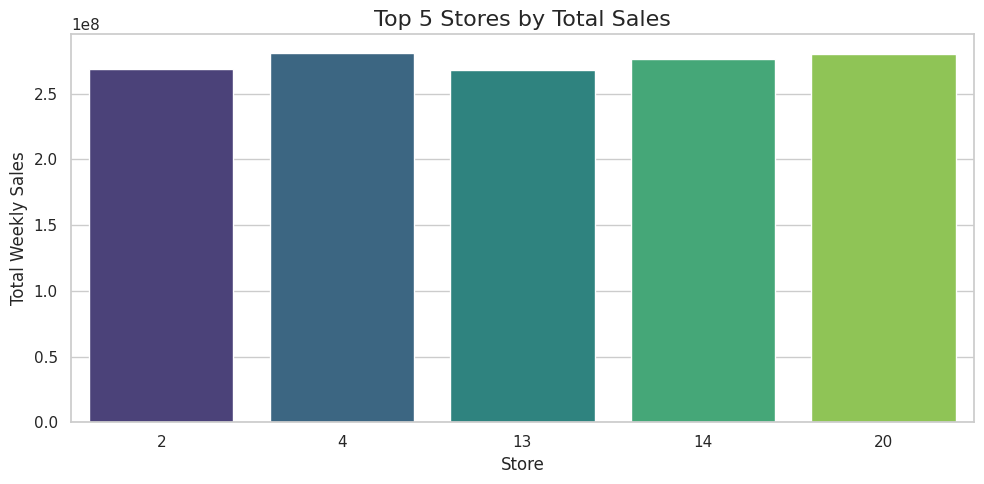

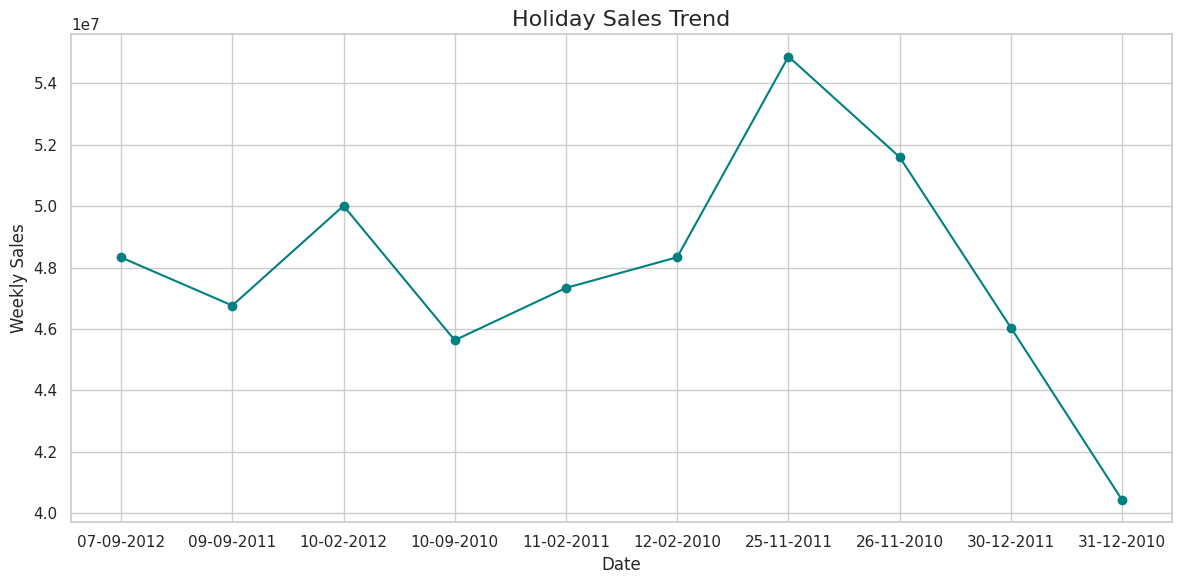

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # consistent style

# ----------------------------
# 1. Top 5 stores by total sales
# ----------------------------
top5 = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top5.index, y=top5.values, palette="viridis")
plt.title('Top 5 Stores by Total Sales', fontsize=16)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Weekly Sales', fontsize=12)
plt.tight_layout()
plt.show()

# ----------------------------
# 2. Holiday sales trend
# ----------------------------
holiday_df = df[df['Holiday_Flag']==1].groupby('Date')['Weekly_Sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(holiday_df.index, holiday_df.values, marker='o', color='teal')
plt.title('Holiday Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.tight_layout()
plt.show()


## Business Insights

### Key Drivers of Walmart Sales
- **Top Stores:** Stores **2, 4, 13, 14, and 20** are the top performers, generating the highest weekly sales.  
- **Holidays:** The T-test shows a significant increase in sales during holidays (**T = 2.68, P = 0.008**), confirming seasonal spikes.  
- **Economic & Environmental Factors:** Regression analysis indicates that **Fuel_Price, CPI, Temperature, and Unemployment** affect sales, though the overall model explains ~15% of the variance (**R² = 0.1481**).

### Feature Impact on Weekly Sales

| Feature       | Coefficient   | Interpretation                                        |
|---------------|---------------|-------------------------------------------------------|
| Holiday_Flag  | 76,321.85     | Sales increase significantly during holidays.        |
| Temperature   | -761.89       | Higher temperatures slightly reduce sales.           |
| CPI           | -2,318.25     | Higher inflation negatively affects sales.           |
| Fuel_Price    | -4,654.77     | Rising fuel prices slightly reduce store visits/sales.|
| Store         | -15,079.61    | Baseline differences in store performance.           |
| Unemployment  | -24,502.35    | Higher unemployment reduces weekly sales.            |

### Insights from Correlations
- **Holiday_Flag** and **Weekly_Sales** show a positive relationship (~0.037).  
- **CPI** and **Unemployment** have a negative correlation with sales (-0.073 and -0.106, respectively), aligning with regression findings.  
- **Fuel_Price** has minimal correlation with overall sales (~0.009), but still contributes negatively in the regression model.

### Recommendations
1. **Holiday Inventory Planning:** Increase stock levels and promotions during holidays to meet demand spikes.  
2. **Store-Specific Strategies:** Focus marketing and operational resources on top-performing stores (2, 4, 13, 14, 20) while identifying growth opportunities in lower-performing stores.  
3. **Monitor Economic Indicators:** Track CPI and unemployment trends to anticipate potential dips in sales and adjust pricing or promotions.  
4. **Fuel Price Considerations:** If fuel prices rise, consider targeted delivery options or promotions to maintain customer traffic.


## 10. Conclusion

### Summary of Findings
- Walmart sales are **strongly influenced by holidays**, with a significant increase in weekly sales during holiday periods (T = 2.68, P = 0.008).  
- **Top-performing stores**—2, 4, 13, 14, and 20—consistently generate the highest revenue.  
- Economic and environmental factors such as **CPI, Fuel_Price, Temperature, and Unemployment** negatively affect weekly sales, although the overall linear regression model explains about **15% of the variance** (R² = 0.1481).  

### Forecasting Insights
- SARIMA modeling captured **seasonal and holiday trends** in weekly sales, allowing reliable **12-week forecasts**.  
- Predicted sales align with historical trends, highlighting peak periods during holidays and seasonal fluctuations.  

### Business Value
- Insights from EDA, statistical analysis, and forecasting can guide **inventory planning, promotional campaigns, and store-specific strategies**.  
- Monitoring key economic indicators (CPI, Fuel_Price, Unemployment) enables proactive adjustments to maintain sales performance.  
- Overall, the analysis provides actionable intelligence for **maximizing revenue during peak periods**, optimizing store operations, and improving business decision-making.
